# Projeto 02 - Analisando dados do Titanic

NOTA: Este projeto faz uma análise dos dados de parte dos tripulantes e passageiros do Titanic. Os dados analisados estão descritos no site [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data).

## Leitura dos dados em CSV

In [1]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# exibindo gráficos na mesma janela
% matplotlib inline

# deixa fundo do gráfico como um grid cinza
sns.set_style('darkgrid')

# lendo arquivo csv
df = pd.read_csv('titanic-data-6.csv')

# exibindo primeiras linhas do arquivo
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Aqui são exibidas os 5 primeiros registros do arquivo CVS lido.

## Limpeza dos dados

### Exibindo as dimensões do conjunto de dados, antes da limpeza dos dados

In [2]:
# exibindo as dimensões do conjunto de dados
df.shape

(891, 12)

Inicialmente, o conjunto de dados é commposto por 891 linhas e 12 colunas.

### Descarte de colunas irrelevantes

In [3]:
# descarte de colunas do conjunto de dados
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# confirmando as mudanças
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


Aqui, confirmamos a exclusão das colunas: Name, Ticket e Cabin.

### Renomeando as colunas

In [4]:
# renomeando colunas
df.rename(index=str, columns={"PassengerId": "Passenger Id", "Pclass": "Ticket Class", 
                              "SibSp": "N Siblings Spouses", "Parch": "N Parents Children"}, inplace=True)

# confirmando as mudanças
df.head(1)

,Passenger Id,Survived,Ticket Class,Sex,Age,N Siblings Spouses,N Parents Children,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


Podemos verificar que as colunas foram renomeadas.

In [5]:
# substituindo espaços por underline e letras para minúsculas
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirmando as mudanças
df.head(1)

,passenger_id,survived,ticket_class,sex,age,n_siblings_spouses,n_parents_children,fare,embarked
0,1,0,3,male,22.0,1,0,7.25,S


Mais uma alteração no nome das colunas.

### Verificando as linhas com valores faltantes

In [6]:
# exibindo a contagem de valores faltantes para cada característica
len(df) - df.count()

passenger_id            0
survived                0
ticket_class            0
sex                     0
age                   177
n_siblings_spouses      0
n_parents_children      0
fare                    0
embarked                2
dtype: int64

De acordo com a listagem acima, podemos verificar que 177 registros para a coluna age e 2 registros para a coluna embarked estão com os valores faltantes. 

### Tratando a coluna: Age

In [7]:
# substituindo as colunas com valores nulos pela média das idades
df['age'].fillna(df['age'].mean(), inplace=True)

### Tratando a coluna: Embarked

In [8]:
# descartando linhas com quaisquer valores nulos no conjunto de dados
df.dropna(inplace=True)

In [9]:
# verificando se quaisquer colunas têm valores nulos - o resultado deve ser False
df.isnull().sum().any()

False

Acima, confirmamos que nenhuma das colunas restantes está com valores nulos.

### Removendo duplicações dos dados

In [10]:
# exibindo o número de duplicatas nos conjuntos de dados
print(sum(df.duplicated()))

0


Verificamos que nenhuma das linhas destes conjunto de dados está com valores duplicados. Mesmo assim, deixamos abaixo a função que remove duplicações existentes, caso se deseje, posteriormente, executar esta análise para outro conjunto de dados.

In [11]:
# descartando duplicatas no conjuntos de dados, caso exista
df.drop_duplicates(inplace=True)

In [12]:
# exibindo o número de duplicatas novamente para confirmar desduplicação - o resultado deve ser 0
print(sum(df.duplicated()))

0


Confirmando a inexistência de duplicações.

## Análise inicial do conjunto de dados

### Exibindo os tipos de dados das colunas

In [13]:
# exibindo tipos de dados
df.dtypes

passenger_id            int64
survived                int64
ticket_class            int64
sex                    object
age                   float64
n_siblings_spouses      int64
n_parents_children      int64
fare                  float64
embarked               object
dtype: object

Acima, listamos o tipo de dados para cada coluna existente.

In [14]:
# verificando tipos das colunas listadas como object
print(type(df['sex'][0]))
print(type(df['embarked'][0]))

<class 'str'>
<class 'str'>


Para as colunas listadas como object, realizamos nova verificação e confirmamos e todas estas tratam-se de strings.

### Exibindo as dimensões do conjunto de dados, após limpeza dos dados

In [15]:
# exibindo as dimensões do conjunto de dados
df.shape

(889, 9)

Verificamos que o conjunto, após a limpeza dos dados, ficou com 889 linhas e 9 colunas. Lembrando que 2 registros foram excluídos por não possuírem valores para a coluna embarked e 3 colunas foram removidas por serem consideradas irrelevantes para esta análise de dados.

## Salvando dados

In [16]:
# salvando dados após limpeza
df.to_csv('titanic-data-6_clean.csv', index=False)

Salvamos os dados após a limpeza em um novo arquivo CSV. Caso seja necessário, futuramente, podemos ler os dados já tratados a partir deste novo arquivo salvo. 

## Perguntas

### Qual o percentual de sobreviventes de cada classe por sexo?

Text(0.5, 0, 'Sex')

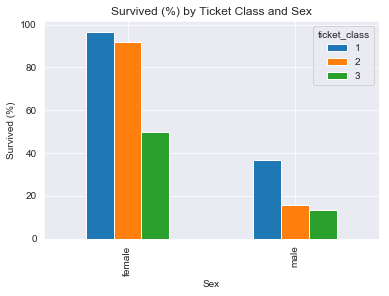

In [17]:
# contagens por valor
surv_class = df.groupby(['sex', 'ticket_class']).survived.mean() * 100

# plotagem do gráfico
surv_class.unstack().plot.bar()

# título e rótulos
plt.title('Survived (%) by Ticket Class and Sex')
plt.ylabel('Survived (%)')
plt.xlabel('Sex')

Acima, listamos o gráfico que representa o percentual de sobreviventes para cada sexo segmentados pela classe do ticket de viagem. Claramente, as mulheres tiveram prioridades sobre os homens na evacuação. Também, infelizmente, verificamos que a classe do ticket influenciou nas chances de sobrevivência desta tragédia histórica.

### Qual o percentual de sobreviventes por idade?

faixa_etaria
criancas        0.584416
adolescentes    0.403226
adultos         0.362445
idosos          0.333333
Name: survived, dtype: float64


Text(0.5, 0, '')

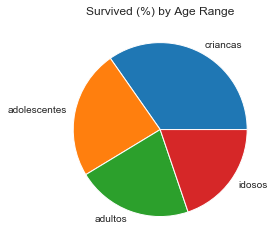

In [18]:
# contagens por valor
df["faixa_etaria"] = pd.cut(df.age, [0, 14, 18, 50, 150], labels=["criancas", "adolescentes", "adultos", "idosos"])
surv_age_range = df.groupby(['faixa_etaria']).survived.mean()
print(surv_age_range)

# plotagem do gráfico
surv_age_range.plot.pie()

# título e rótulos
plt.title('Survived (%) by Age Range')
plt.ylabel('')
plt.xlabel('')

O gráfico de pizza acima nos mostra que quanto menor a faixa etária, maiores eram as chances de sobrevivência.

### A existência de parentes influenciou nas chances de sobrevivência?

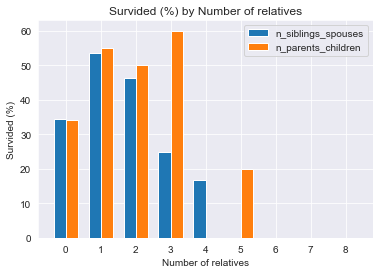

In [19]:
# contagens por valor
surv_sib_spo = df.groupby(['n_siblings_spouses']).survived.mean() * 100
surv_par_chi = df.groupby(['n_parents_children']).survived.mean() * 100

# normalizando os 2 agrupamentos de valores
surv_sib_spo[6] = 0
surv_sib_spo[7] = 0
surv_par_chi[7] = 0
surv_par_chi[8] = 0

# largura das barras
width = 0.35

# localização no eixo x dos grupos
x1 = np.arange(len(surv_sib_spo))
x2 = x1 + width

# plotagem do gráfico
plt.bar(x1, surv_sib_spo, width, label='n_siblings_spouses')
plt.bar(x2, surv_par_chi, width, label='n_parents_children')

# título e rótulos
plt.title('Survided (%) by Number of relatives')
plt.ylabel('Survided (%)')
plt.xlabel('Number of relatives')

# localização dos marcadores no eixo x
locations = x1 + width / 2  

# rótulos dos marcadores no eixo x
labels = surv_par_chi.index

# seta as localizacoes dos riscados e labels do eixo x
plt.xticks(locations, labels)

# adiciona legenda ao gráfico - label dos graficos
plt.legend()

Este gráfico de barras exibe o percentual de sobreviventes de acordo com o número de cônjugue/irmãos e com o número de pais/filhos presentes no navio. O que fica mais claro neste gráfico é o fato de que a partir de 4 cônjugue/irmãos ou 4 pais/filhos presentes, as chances de sobrevivência eram menores de 20%.

## Conclusão

### Qual o percentual de sobreviventes de cada classe por sexo?

Observando o gráfico gerado, podemos ver que o percentual de mulheres sobreviventes foi bem maior do que o dos homens. Também, independentemente do sexo, a classe do ticket influenciou nas chances de sobrevivência. De modo que os melhores tickets (primeira classe) davam maiores chances do que os piores tickets (terceira classe).

### Qual o percentual de sobreviventes por idade?

De acordo com o gráfico de pizza, pode-se observar que as crianças e os adolescentes tiveram prioridade na evacuação, dada as maiores chances de sobrevivência. 

### A existência de parentes influenciou nas chances de sobrevivência?

Quando observamos o gráfico de barras, podemos verificar que as pessoas que tinham maiores chances de sobrevivência eram as que possuíam exatamente 1 irmão ou cônjuge. Também, aqueles que possuíam de 1 a 3 parentes, que fossem pais ou filhos, tinham mais de 50% de chance de sobreviver.

Outro fato, que podemos observar no gráfico apresentado, é que se o passageiro possuísse 4 ou mais parentes à bordo que fossem do tipo pais/filhos ou irmãos/conjugue, suas chances de sobrevivência foram abaixo de 20%. Isto leva a crer que, possivelmente, este passageiro tinham muitos parentes para cuidar em um momento de desespero, diminuindo suas chances de sobrevivência.

## Limitações

Em uma análise inicial, percebeu-se a existência de dados faltantes nos valores de algumas propriedades dos passageiros. Após o descarte de algumas propriedades que foram consideradas irrelevantes, foi verificada a existência das seguintes colunas com valores faltantes: Age e Embarked.

Para cada uma destas propriedades, foram tomadas as seguintes decisões:

 - **Age:** Foram encontrados 177 registros com valores faltantes de uma amostra total de 891, representando aproximadamente 20% dos dados. Como tal amostragem é bastante representativa e para não perder as demais informações, foi decidido substituir os valores faltantes pela média das idades. 
 
 
 - **Embarked:** Como foram encontrados apenas 2 registros com os valores faltantes, decidiu-se efetuar a exclusão dos mesmos, pois estes não representavam uma amostragem significativa. 
 